In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
datos = pd.read_excel('EX2_Simple_linear_regression_Dataset.xlsx')
datos.head(2)

,Altura (cm),Peso (kg)
0,159,63.64
1,178,83.12


In [3]:
x = datos[['Altura (cm)']] # variable indpendiente
y = datos[['Peso (kg)']] # variable dependiente

In [4]:
clf = LinearRegression()
clf.fit(x,y) # entrenar el modelo

LinearRegression()

In [5]:
m = clf.coef_[0][0]
b = clf.intercept_[0]

print("Pendiente:", m)
print("Intercepto:", b)

Pendiente: 1.1530382212811012
Intercepto: -127.24310513499208


In [6]:
# Estimación (Si altura (x) = 168, su estimado peso (y) es --> 66,46 kg)
estimacion_peso = m*168 + b
estimacion_peso

np.float64(66.46731604023293)

In [7]:
# Estimación (Si peso (y) = 74.36, su estimada altura (x) es --> 174,84 cm)
estimacion_altura = (74.36-b) / m
estimacion_altura

np.float64(174.84511910715133)

In [8]:
# Error estándard de la estimación (Sxy):
y_pred = clf.predict(x)
n = len(y)
sxy = np.sqrt(np.sum((y - y_pred) ** 2, axis=0) / (n - 2))
print("Error estándard de la regresión:", sxy.iloc[0])

Error estándard de la regresión: 8.489766240567596


In [9]:
# Coeficiente de correlación para la recta de regresión (Coeficiente de Pearson) (r)
coef_Pearson = np.corrcoef(y.values.flatten(), y_pred.flatten())[0, 1]
print("Coeficiente de correlacion de Pearson:", coef_Pearson)

Coeficiente de correlacion de Pearson: 0.8669090583973165


In [10]:
# Coeficiente de determinación (r²)
r2 = r2_score(y, y_pred) * 100
r2_alternative = pow(coef_Pearson, 2)  * 100
print("Coeficiente de determinación:", r2, "%")
print("Coeficiente de determinación (usando coef. Pearson):", r2_alternative, "%")

Coeficiente de determinación: 75.1531315531322 %
Coeficiente de determinación (usando coef. Pearson): 75.1531315531322 %


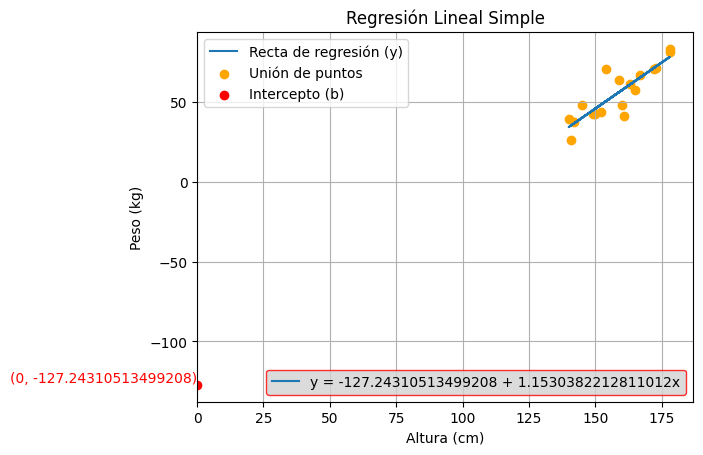

In [11]:
plt.plot(x, clf.predict(x)) # linea de predicción (azul)
plt.scatter(x,y, color='orange') # grafico uniendo puntos (naranja)
plt.title("Regresión Lineal Simple")
plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")
plt.scatter(0, b, color='red', label='Punto (0, b)')
plt.text(0, b, f'({0}, {b})', verticalalignment='bottom', horizontalalignment='right', color='red')
leyenda1 = plt.legend(["Recta de regresión (y)", "Unión de puntos", "Intercepto (b)"])
leyenda2 =  plt.legend([f"y = {b} + {m}x"], loc="lower right", facecolor='lightgrey', edgecolor='red')
plt.gca().add_artist(leyenda1)
plt.xlim(xmin=0)
plt.grid()
plt.show()